### 데이터 불러오기

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### 데이터 일부 확인

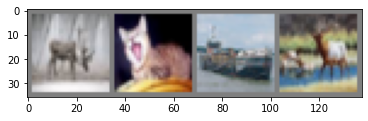

deer  cat   ship  deer 


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 모델 정의
이후부터 과제 진행하시면 됩니다! 위는 수정 XX

'#####으로 표시된 부분에 작성하세요!

In [4]:
print(trainset.__getitem__(0)[0].size(), trainset.__len__())
print(testset.__getitem__(0)[0].size(), testset.__len__())

print(len(trainset),len(testset))

torch.Size([3, 32, 32]) 50000
torch.Size([3, 32, 32]) 10000
50000 10000


In [8]:
num_epoch=10
batch_size=256
learning_rate= 0.0002

In [5]:
import torch.nn as nn

In [6]:
# conv. layer, relu,  pooling layer, fc layer를 모두 1층 이상 사용하는 모델 Net()을 만들어주세요

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        ##### 아래 작성 #####

        self.layer = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3),             # [batch_size,[3,32,32] -> [batch_size,12,16,16] # 2^10*3
            nn.ReLU(),                                                          # 필터의 개수(12개) 임의로 설정 
            nn.Conv2d(in_channels=16,out_channels=48,kernel_size=3),            # [batch_size,12,16,16] -> [batch_size,48,8,8]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),                               # [batch_size,48,8,8] -> [batch_size,48,4,4]
            nn.Conv2d(in_channels=48, out_channels=72, kernel_size=3),          # [batch_size,48,4,4] -> [batch_size,192,2,2]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)                                # [batch_size,192,2,2] -> [batch_size,192,1,1]
        )
        self.fc_layer = nn.Sequential(                                          
            nn.Linear(72*6*6,100),                                              # [batch_size,192] -> [batch_size,100]
            nn.ReLU(),
            nn.Linear(100,10)                                                   # [batch_size,100] -> [batch_size,10]
        )       
            

    def forward(self, x):
       ##### 아래 작성 #####
        out = self.layer(x)                                                     # self.layer에 정의한 Sequential의 연산을 차례로 수행
        out = out.view(out.size(0),-1)                                           # view 함수를 이용해 텐서를 flatten 
                                                                                # ex) 2x3 텐서를 .view(1,-1) 해주면 1x6으로, view(3,-1)이면 3x2로
                                                                                # !전체 텐서의 크기가 batch_size로 나누어 떨어지지 않으면 오류!
        out = self.fc_layer(out)
        return out


net = Net()

## 손실함수, optimizer 정의
필요한 모듈을 import하고 손실함수는 CrossEntropyLoss, optimizer는 SGD를 사용해주세요.

optimizer의 하이퍼파라미터는 lr=0.001, momentum=0.9로 통일합니다.

작성한 모델이 무거워 실행 시간이 오래 걸린다면 GPU를 활용하세요.

In [7]:
import torch.optim as optim 

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.001, momentum =0.9)

## 모델 구조 확인
필요한 모듈을 import하여 모델의 구조를 확인하세요.

In [8]:
from torchsummary import summary
summary(net,(3,32,32), batch_size=256)          # 파이토치는 입력을 (channel, width, height) 순으로

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [256, 16, 30, 30]             448
              ReLU-2          [256, 16, 30, 30]               0
            Conv2d-3          [256, 48, 28, 28]           6,960
              ReLU-4          [256, 48, 28, 28]               0
         MaxPool2d-5          [256, 48, 14, 14]               0
            Conv2d-6          [256, 72, 12, 12]          31,176
              ReLU-7          [256, 72, 12, 12]               0
         MaxPool2d-8            [256, 72, 6, 6]               0
            Linear-9                 [256, 100]         259,300
             ReLU-10                 [256, 100]               0
           Linear-11                  [256, 10]           1,010
Total params: 298,894
Trainable params: 298,894
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 3.00
Forward/

## Train

In [9]:
# 모델을 학습

for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        ##### 아래 작성 #####
        optimizer.zero_grad() 
        output=net.forward(inputs)   
        loss=criterion(output, labels)    
        loss.backward()                     
        optimizer.step() 


        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.133
[1,  4000] loss: 1.705
[1,  6000] loss: 1.557
[1,  8000] loss: 1.439
[1, 10000] loss: 1.375
[1, 12000] loss: 1.327
[2,  2000] loss: 1.204
[2,  4000] loss: 1.164
[2,  6000] loss: 1.115
[2,  8000] loss: 1.054
[2, 10000] loss: 1.021
[2, 12000] loss: 0.985
Finished Training


## Test

In [10]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [11]:
## 아래 코드 그대로 실행

correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 64 %


## 클래스별 accuracy 비교

In [12]:
## 아래 코드 그대로 실행

# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 81.0 %
Accuracy for class: car   is 91.0 %
Accuracy for class: bird  is 54.7 %
Accuracy for class: cat   is 37.1 %
Accuracy for class: deer  is 66.6 %
Accuracy for class: dog   is 37.8 %
Accuracy for class: frog  is 84.7 %
Accuracy for class: horse is 67.6 %
Accuracy for class: ship  is 66.6 %
Accuracy for class: truck is 58.1 %
